## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
tips=sns.load_dataset("tips")

### 1. Make a list of categorical and numerical columns in the data.

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [24]:
tips.select_dtypes(include=np.number).head().columns.tolist()


['total_bill', 'tip', 'size']

In [31]:
tips.select_dtypes(include='category').columns.tolist()

['sex', 'smoker', 'day', 'time']

### 2. Compute the average bill amount for each day.

In [6]:
tips_avg=tips.groupby('day')['total_bill'].mean().reset_index()
tips_avg

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


### 3. Which gender is more generous in giving tips?

In [7]:
tips.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

From the data above its clear that male is more generous in giving tips

### 4. According to the data, were there more customers for dinner or lunch?

In [8]:
tips.groupby('time')['size'].sum().reset_index()

,time,size
0,Lunch,164
1,Dinner,463


From the data above its clear that there is more inflow of customer for dinner

### 5. Based on the statistical summary, comment on the variable 'tip'

In [9]:
tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Total there are 244 entries of tips given,among these entries the maximum tip recieved is 10.00 where as minimum tip is 1.00 and the average tip is 2.99

### 6. Find the busiest day in terms of the orders?

In [10]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Saturday was the busiest day with 87 orders

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

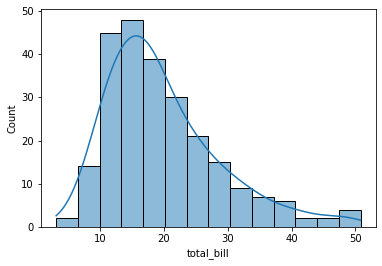

In [11]:
sns.histplot(data=tips,x='total_bill',kde=True)


Plot depicts that there is positive skewness in the distribution to confirm lets check with mean,mode and skew

In [39]:
mean=tips['total_bill'].mean()
mode=tips['total_bill'].mode()
print("Mean=",mean,"Mode=",mode)

Mean= 19.785942622950824 Mode= 0    13.42
Name: total_bill, dtype: float64


Mean is greater than mode so there is a positive skewness in the distribution

In [12]:
tips['total_bill'].skew()

1.1332130376158205

With skew data greater than 1 it confirms positive skewness

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

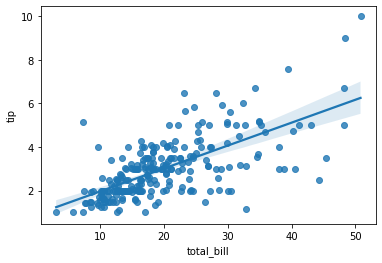

In [13]:
sns.regplot(x=tips['total_bill'],y=tips['tip'])

plot clearly depicts that there is a positive relation of total bill amount and tip given,thus with increase in bill ammount customer gives more tip

### 9. What is the percentage of males and females in the dataset? and display it in the plot

<AxesSubplot:ylabel='sex'>

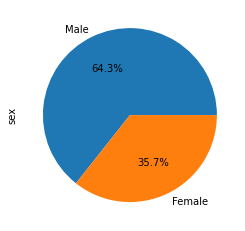

In [41]:
tips['sex'].value_counts().plot(kind='pie',autopct='%.1f%%')

Males are more than females

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [46]:
pd.crosstab(tips['sex'],tips['smoker'])

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


<AxesSubplot:xlabel='sex'>

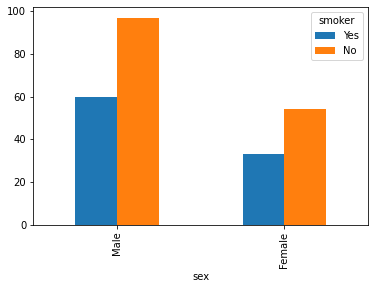

In [45]:
pd.crosstab(tips['sex'],tips['smoker']).plot(kind='bar')

Plot depicts that non smoker are more than smoker in both male and female

### 11. Compute the average tip amount given for different days and display it in the plot.

    day       tip
0  Thur  2.771452
1   Fri  2.734737
2   Sat  2.993103
3   Sun  3.255132


<AxesSubplot:>

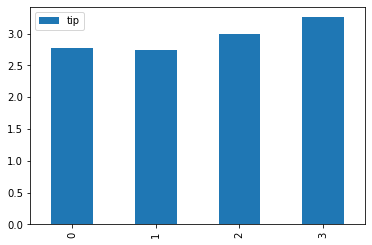

In [53]:
avg_tip=tips.groupby('day')['tip'].mean().reset_index()
print(avg_tip)
avg_tip.plot(kind='bar')


Sunday have the heighest average tip

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

,size,total_bill
0,1,7.242500
1,2,16.448013
2,3,23.277632
3,4,28.613514
4,5,30.068000
5,6,34.830000


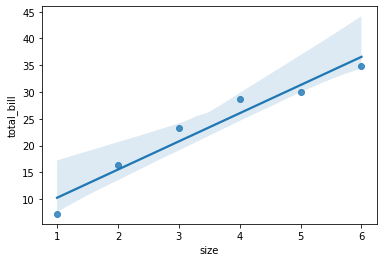

In [16]:
tip1=tips.groupby('size')['total_bill'].mean().reset_index()
sns.regplot(x=tip1['size'],y=tip1['total_bill'])
tip1

Plot shows positive relation which confirms that with increase in size of the group bill ammount increases

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

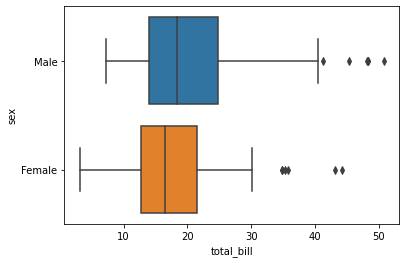

In [17]:
sns.boxplot(x=tips['total_bill'],y=tips['sex'],orient="h")

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [18]:
a=tips.groupby('day')['total_bill'].max()
a.loc[['Sat','Sun']]

day
Sat    50.81
Sun    48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [19]:
(tips.isna().sum())*100/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [20]:
tips.duplicated().sum()


1

In [55]:
dr=tips.drop_duplicates()
dr.duplicated().sum()


0

One duplicated value dropped

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

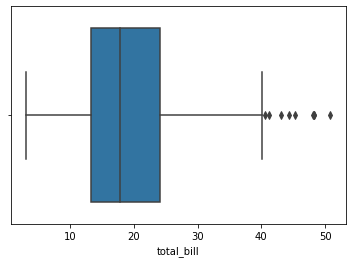

In [60]:
sns.boxplot(tips['total_bill'],orient='h')
plt.show()

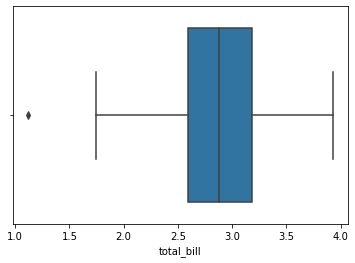

In [59]:
data_log=np.log(tips['total_bill'])
sns.boxplot(data_log,orient='h')
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

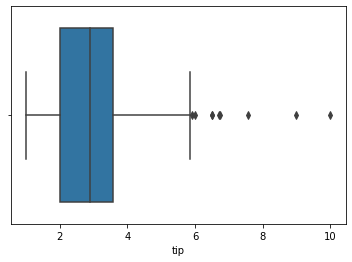

In [62]:
sns.boxplot(tips['tip'],orient='h')
plt.show()

In [66]:
Q1=tips['tip'].quantile(0.25)
Q3=tips['tip'].quantile(0.75)
Q2=tips['tip'].quantile(0.50)
IQR=Q3-Q1
L_W=Q1-(1.5*IQR)
U_W=Q3+(1.5*IQR)
print("Q1=",Q1,"Q2=",Q2,"Q3=",Q3)
print("IQR=",IQR)
print("Lower Wisker=",L_W,"Upper Wisker=",U_W)


Q1= 2.0 Q2= 2.9 Q3= 3.5625
IQR= 1.5625
Lower Wisker= -0.34375 Upper Wisker= 5.90625


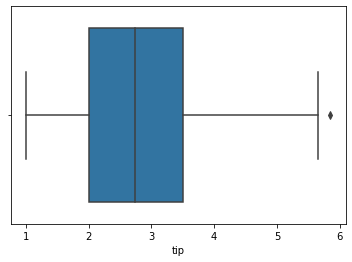

In [67]:
df_iqr=tips.loc[(tips['tip']<U_W)&(tips['tip']>L_W)]
sns.boxplot(df_iqr['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [86]:
tips=pd.get_dummies(tips,drop_first=True)
tips.sample(5)

,total_bill,tip,size,total_billmm,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
21,20.29,2.75,2,0.360704,1,1,0,1,0,1
93,16.32,4.30,2,0.277545,1,0,1,0,0,1
173,31.85,3.18,2,0.602849,0,0,0,0,1,1
171,15.81,3.16,2,0.266862,0,0,0,1,0,1
69,15.01,2.09,2,0.250105,0,0,0,1,0,1


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [87]:
tb_max=tips['total_bill'].max()
tb_min=tips['total_bill'].min()
range1=tb_max-tb_min
print("Before transformation range=", range1)
from sklearn.preprocessing import MinMaxScaler
tips['total_billmm']=MinMaxScaler().fit_transform(tips[['total_bill']])
tb_max2=tips['total_billmm'].max()
tb_min2=tips['total_billmm'].min()
range2=tb_max2-tb_min2
print("After transformation range=",range2)

Before transformation range= 47.74
After transformation range= 0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [88]:
tips_df=tips.copy()

#i) Encode the categorical variables.
tips_df=pd.get_dummies(tips_df,drop_first=True)
tips_df.sample(5)


,total_bill,tip,size,total_billmm,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
9,14.78,3.23,2,0.245287,0,1,0,0,1,1
110,14.00,3.00,2,0.228948,0,1,0,1,0,1
227,20.45,3.00,4,0.364055,0,1,0,1,0,1
28,21.70,4.30,2,0.390239,0,1,0,1,0,1
45,18.29,3.00,2,0.318810,0,1,0,0,1,1


In [89]:
#ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable
y=tips_df['tip']
x=tips_df.drop(['tip'],axis=1)

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,train_size=0.70,random_state=88,shuffle=True)

from sklearn.preprocessing import MinMaxScaler
tips_df[['total_bill','size']]=MinMaxScaler().fit_transform(tips_df[['total_bill','size']])
tips_df.head(5)



,total_bill,tip,size,total_billmm,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,0.291579,1.01,0.2,0.291579,1,1,0,0,1,1
1,0.152283,1.66,0.4,0.152283,0,1,0,0,1,1
2,0.375786,3.50,0.4,0.375786,0,1,0,0,1,1
3,0.431713,3.31,0.2,0.431713,0,1,0,0,1,1
4,0.450775,3.61,0.6,0.450775,1,1,0,0,1,1


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [95]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.predict(x_test)
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
R2

0.4192081043993674

### Happy Learning:)